In [1]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


# LOAD CSV FILE INTO MEMORY

In [2]:
data = pandas.read_csv('uber-raw-data-apr14.csv')

In [3]:
data.tail() #last 5 entries

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [4]:
dt = '4/30/2014 23:22:00'

In [5]:
dt.split(' ')

['4/30/2014', '23:22:00']

In [6]:
d,t = dt.split(' ')
print(d)
print(t)

4/30/2014
23:22:00


In [7]:
m,d,y = d.split('/')
print(m)
print(d)
print(y)

4
30
2014


In [8]:
#the individual elements are strings and not integers
d

'30'

In [9]:
int(d)

30

#### Effecient way of doing the above

In [10]:
dt = pandas.to_datetime(dt)
dt
#format changes to timestamp -> year-month-date

Timestamp('2014-04-30 23:22:00')

In [11]:
print(dt.day)
print(dt.month)
print(dt.year)

30
4
2014


## Converting Date/Time column data to pandas datetime format

In [36]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [13]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


### Add date of month(dom) for analysis

In [14]:
def get_dom(dt):
    return dt.day

In [15]:
#Creating date of month column
data['dom'] = data['Date/Time'].map(get_dom)

In [16]:
dt = data['Date/Time'][5000]

In [17]:
dt.day

4

In [18]:
data.head()

,Date/Time,Lat,Lon,Base,dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [19]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


### Add various other columns for analysis

In [20]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# Analysis

### Analyze the DoM

(array([52721., 59680., 52581., 58631., 45427., 56764., 38781., 60673.,
        64697., 74561.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

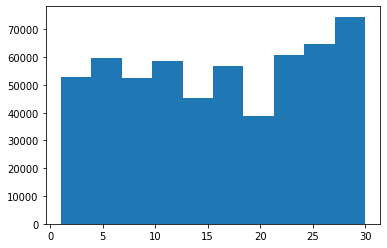

In [21]:
#histograms
hist(data.dom)

(array([14546., 17474., 20701., 26714., 19521., 13445., 19550., 16188.,
        16843., 20041., 20420., 18170., 12112., 12674., 20641., 17717.,
        20973., 18074., 14602., 11017., 13162., 16975., 20346., 23352.,
        25095., 24925., 14677., 15475., 22835., 36251.]),
 array([ 1.        ,  1.96666667,  2.93333333,  3.9       ,  4.86666667,
         5.83333333,  6.8       ,  7.76666667,  8.73333333,  9.7       ,
        10.66666667, 11.63333333, 12.6       , 13.56666667, 14.53333333,
        15.5       , 16.46666667, 17.43333333, 18.4       , 19.36666667,
        20.33333333, 21.3       , 22.26666667, 23.23333333, 24.2       ,
        25.16666667, 26.13333333, 27.1       , 28.06666667, 29.03333333,
        30.        ]),
 <a list of 30 Patch objects>)

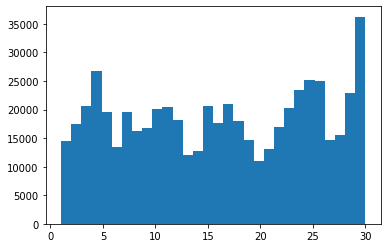

In [22]:
#bins increase the number of bars in the graph
hist(data.dom, bins=30)

(array([14546., 17474., 20701., 26714., 19521., 13445., 19550., 16188.,
        16843., 20041., 20420., 18170., 12112., 12674., 20641., 17717.,
        20973., 18074., 14602., 11017., 13162., 16975., 20346., 23352.,
        25095., 24925., 14677., 15475., 22835., 36251.]),
 array([ 1.        ,  1.96666667,  2.93333333,  3.9       ,  4.86666667,
         5.83333333,  6.8       ,  7.76666667,  8.73333333,  9.7       ,
        10.66666667, 11.63333333, 12.6       , 13.56666667, 14.53333333,
        15.5       , 16.46666667, 17.43333333, 18.4       , 19.36666667,
        20.33333333, 21.3       , 22.26666667, 23.23333333, 24.2       ,
        25.16666667, 26.13333333, 27.1       , 28.06666667, 29.03333333,
        30.        ]),
 <a list of 30 Patch objects>)

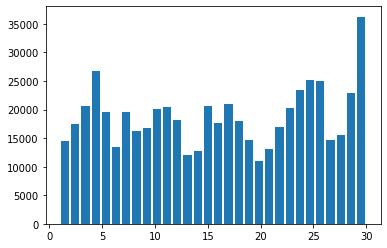

In [23]:
#to distinguish between the various bars we reduce its width to 80%(0.8) of the original 
hist(data.dom, bins=30, rwidth=.8)

(array([14546., 17474., 20701., 26714., 19521., 13445., 19550., 16188.,
        16843., 20041., 20420., 18170., 12112., 12674., 20641., 17717.,
        20973., 18074., 14602., 11017., 13162., 16975., 20346., 23352.,
        25095., 24925., 14677., 15475., 22835., 36251.,     0.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5]),
 <a list of 31 Patch objects>)

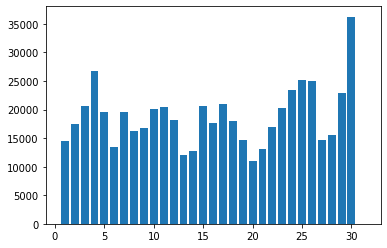

In [24]:
#the bars dont correctly align on to the numbers
#thus we modify range for the graph to lie on top of the required intervals
#for better presentation
hist(data.dom, bins=31, rwidth=.8, range=(0.5,31.5))

Text(0.5, 1.0, 'Frequency by DoM-Uber-APR2014')

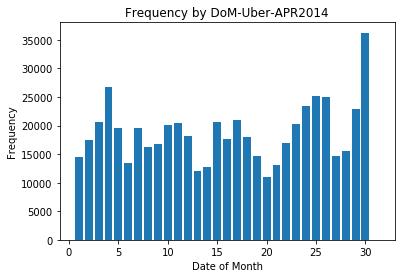

In [25]:
#final touches
hist(data.dom, bins=31, rwidth=.8, range=(0.5,31.5))
xlabel('Date of Month')
ylabel('Frequency')
title('Frequency by DoM-Uber-APR2014')

In [26]:
#entries for different dates of month
for k, rows in data.groupby('dom'):
    print((k,len(rows)))

(1, 14546)
(2, 17474)
(3, 20701)
(4, 26714)
(5, 19521)
(6, 13445)
(7, 19550)
(8, 16188)
(9, 16843)
(10, 20041)
(11, 20420)
(12, 18170)
(13, 12112)
(14, 12674)
(15, 20641)
(16, 17717)
(17, 20973)
(18, 18074)
(19, 14602)
(20, 11017)
(21, 13162)
(22, 16975)
(23, 20346)
(24, 23352)
(25, 25095)
(26, 24925)
(27, 14677)
(28, 15475)
(29, 22835)
(30, 36251)


In [27]:
#just for help
for k, rows in data.groupby('dom'):
    print(k,rows)
    break
#break is to stop the output at 1st day of the month

1                  Date/Time      Lat      Lon    Base  dom  weekday  hour
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512    1        1     0
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512    1        1     0
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512    1        1     0
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512    1        1     0
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512    1        1     0
...                    ...      ...      ...     ...  ...      ...   ...
554926 2014-04-01 23:21:00  40.7219 -73.9920  B02764    1        1    23
554927 2014-04-01 23:25:00  40.7261 -74.0027  B02764    1        1    23
554928 2014-04-01 23:38:00  40.7364 -73.9926  B02764    1        1    23
554929 2014-04-01 23:41:00  40.7149 -73.9405  B02764    1        1    23
554930 2014-04-01 23:46:00  40.7493 -73.9768  B02764    1        1    23

[14546 rows x 7 columns]


In [28]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

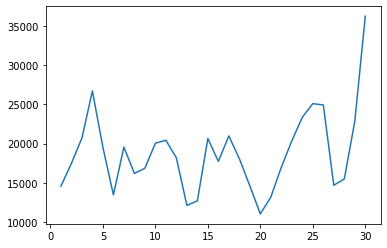

In [29]:
plot(by_date)

<BarContainer object of 30 artists>

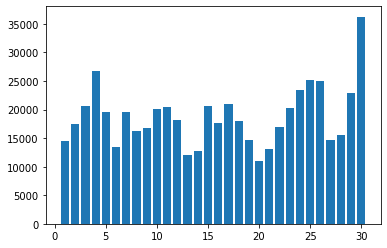

In [30]:
bar(range(1,31),by_date)
#same as the histogram generated before

In [31]:
#sorting
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

<BarContainer object of 30 artists>

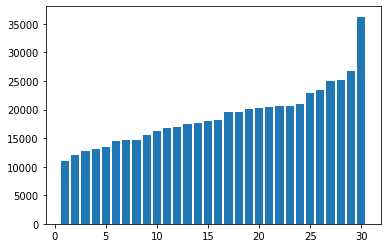

In [32]:
bar(range(1,31),by_date_sorted)

''

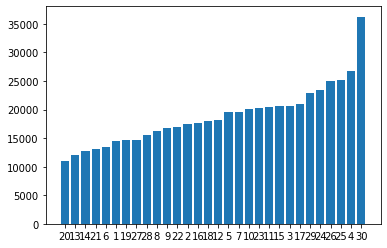

In [33]:
#to fix the x-axis
bar(range(1,31),by_date_sorted)
xticks(range(1,31), by_date_sorted.index) #for sorting x-axis
#to remove unwanted text use ';'
; 

### Analyze the hour

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]),
 <a list of 24 Patch objects>)

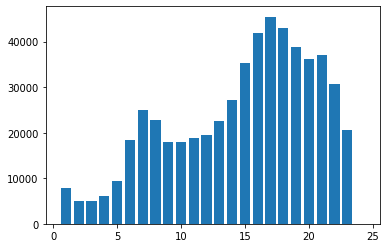

In [34]:
hist(data.hour, bins=24, rwidth=.8, range=(0.5,24.5))

### Analyze the weekday

''

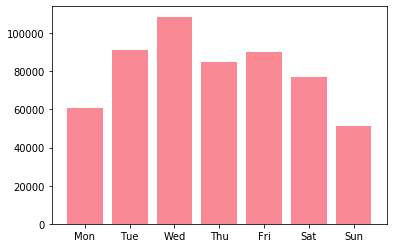

In [35]:
hist(data.weekday, bins=7, range=(-.5,6.5), rwidth=.8, color='#f53d4f', alpha=.6)  #alpha is for opacity of the bars
xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split())
;

In [37]:
count_rows(data)

564516

In [38]:
len(data)

564516

### Cross Analysis (hour,dow)

In [43]:
bt_h_d = data.groupby('weekday hour'.split()).apply(count_rows)
bt_h_d

weekday  hour
0        0        518
         1        261
         2        238
         3        571
         4       1021
                 ... 
6        19      2579
         20      2276
         21      2310
         22      1639
         23      1018
Length: 168, dtype: int64

In [47]:
by_cross = bt_h_d.unstack()
by_cross

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


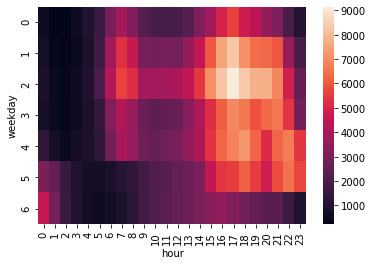

In [48]:
seaborn.heatmap(by_cross)

### BY Lat and Lon

''

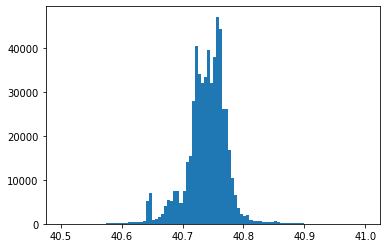

In [50]:
hist(data['Lat'], bins=100, range=(40.5,41))
;

''

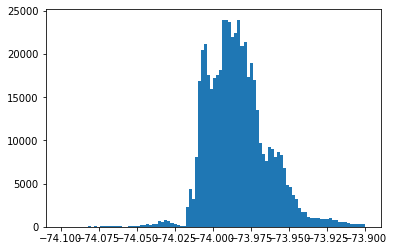

In [52]:
hist(data['Lon'],bins=100,range=(-74.1,-73.9))
;

''

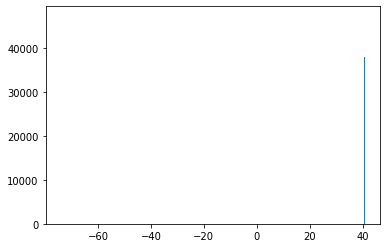

In [54]:
hist(data['Lat'], bins=100, range=(40.5,41))
hist(data['Lon'],bins=100,range=(-74.1,-73.9))
;

''

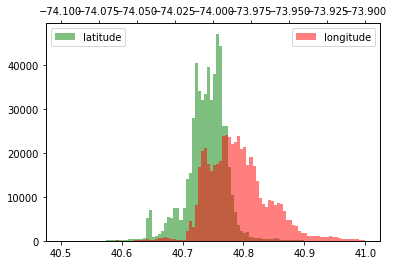

In [63]:
hist(data['Lat'], bins=100, range=(40.5,41), color='g', alpha=.5, label = 'latitude')
#grid() #for grid lines
legend(loc='upper left')
twiny() #for upper and lower x-axis
hist(data['Lon'],bins=100, range=(-74.1,-73.9), color='r', alpha=.5, label = 'longitude')
#grid()
legend(loc='best')
;

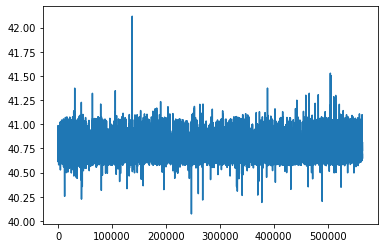

In [64]:
plot(data['Lat'])

(0, 100)

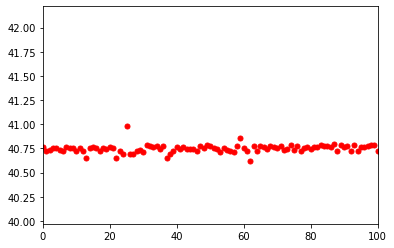

In [75]:
plot(data['Lat'] ,'.', ms=10, color='red', label='lat')
xlim(0,100) #sets the x-axis limits

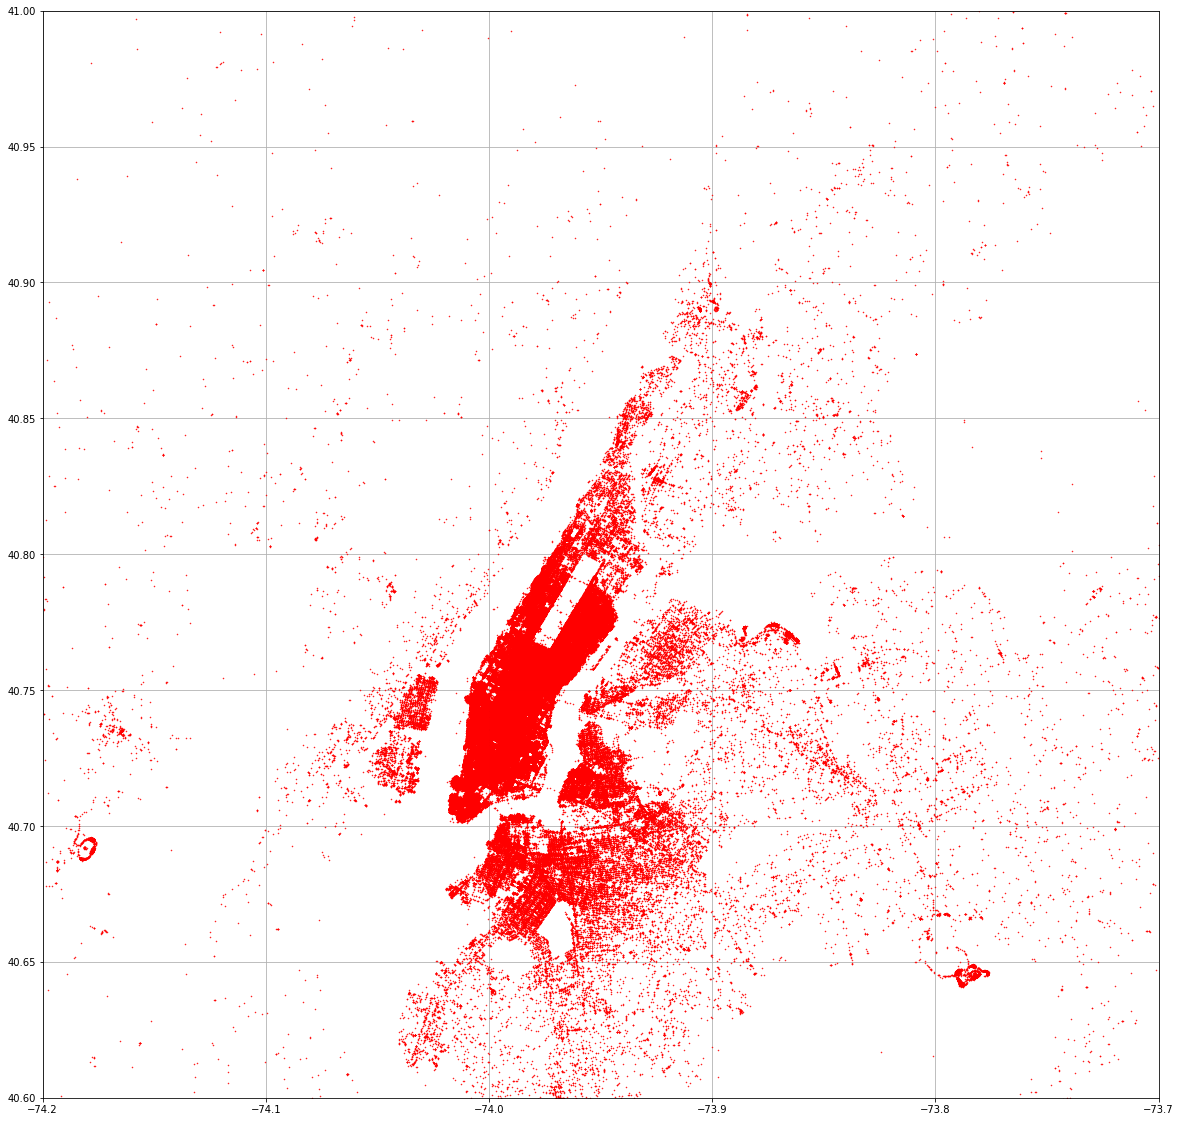

In [82]:
figure(figsize=(20,20))
plot(data['Lon'], data['Lat'] ,'.', ms=1, color='red', label='lat')
xlim(-74.2,-73.7)
ylim(40.6,41)
grid()